# Bhutan Maternal Health Data - Exploratory Data Analysis
## WHO Data Analysis (2000-2023)

In [1]:
import sys
sys.path.append('..')

from src.data_loader import load_maternal_health_data, validate_data, get_column_summary
from src.preprocessing import handle_missing_values
from src.utils import plot_trend_over_years, correlation_heatmap, summary_statistics_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load data
df = load_maternal_health_data()
df.head(10)

✅ Loaded 24 rows, 8 columns from ../data/raw/cleaned_maternal_health_data.csv


,Year,Adolescent birth rate (per 1000 women),Antenatal care coverage - at least four visits (%),Births attended by skilled health personnel (%),Births by caesarean section (%),Number of women of reproductive age (aged 15-49 years) with anaemia (thousands),Prevalence of anaemia in women of reproductive age (aged 15-49) (%),Proportion of births delivered in a health facility (Facility births) (%)
0,2000,NaN,NaN,27.0,NaN,27.166667,33.033333,19.8
1,2001,NaN,NaN,NaN,NaN,27.466667,32.633333,NaN
2,2002,NaN,NaN,NaN,NaN,27.933333,32.233333,NaN
3,2003,NaN,NaN,56.0,NaN,28.466667,31.933333,56.1
4,2004,36.467720,NaN,NaN,NaN,29.200000,31.700000,NaN
5,2005,36.467720,NaN,52.0,NaN,29.966667,31.533333,NaN
6,2006,43.814434,NaN,57.0,NaN,30.700000,31.300000,NaN
7,2007,NaN,NaN,71.0,NaN,31.400000,31.100000,NaN
8,2008,NaN,NaN,66.0,NaN,32.033333,30.900000,NaN
9,2009,59.000000,NaN,66.0,NaN,32.666667,30.700000,NaN


In [3]:
# Validation report
report = validate_data(df)
print("Year Range:", report['year_range'])
print("\nMissing Values:")
for col, count in report['missing_values'].items():
    print(f"  {col}: {count}")

Year Range: (2000, 2023)

Missing Values:
  Year: 0
  Adolescent birth rate (per 1000 women): 13
  Antenatal care coverage - at least four visits (%): 20
  Births attended by skilled health personnel (%): 4
  Births by caesarean section (%): 23
  Number of women of reproductive age (aged 15-49 years) with anaemia (thousands): 0
  Prevalence of anaemia in women of reproductive age (aged 15-49) (%): 0
  Proportion of births delivered in a health facility (Facility births) (%): 18


In [4]:
# Clean data
df_clean = handle_missing_values(df, strategy='interpolate')
print("Missing values after cleaning:")
print(df_clean.isnull().sum())

Missing values after cleaning:
Year                                                                               0
Adolescent birth rate (per 1000 women)                                             0
Antenatal care coverage - at least four visits (%)                                 0
Births attended by skilled health personnel (%)                                    0
Births by caesarean section (%)                                                    0
Number of women of reproductive age (aged 15-49 years) with anaemia (thousands)    0
Prevalence of anaemia in women of reproductive age (aged 15-49) (%)                0
Proportion of births delivered in a health facility (Facility births) (%)          0
dtype: int64


In [5]:
# Summary statistics
summary_statistics_report(df_clean)

,Mean,Median,Std Dev,Min,Max,Range
Year,2011.50,2011.50,7.07,2000.00,2023.00,23.00
Adolescent birth rate (per 1000 women),26.14,26.62,17.25,3.06,59.00,55.94
Antenatal care coverage - at least four visits (%),81.34,80.45,4.15,77.30,87.20,9.90
Births attended by skilled health personnel (%),74.25,73.00,21.82,27.00,99.00,72.00
Births by caesarean section (%),12.40,12.40,0.00,12.40,12.40,0.00
Number of women of reproductive age (aged 15-49 years) with anaemia (thousands),35.61,34.37,6.47,27.17,48.87,21.70
Prevalence of anaemia in women of reproductive age (aged 15-49) (%),31.53,31.38,0.86,30.50,33.40,2.90
Proportion of births delivered in a health facility (Facility births) (%),71.40,72.19,21.42,19.80,94.50,74.70


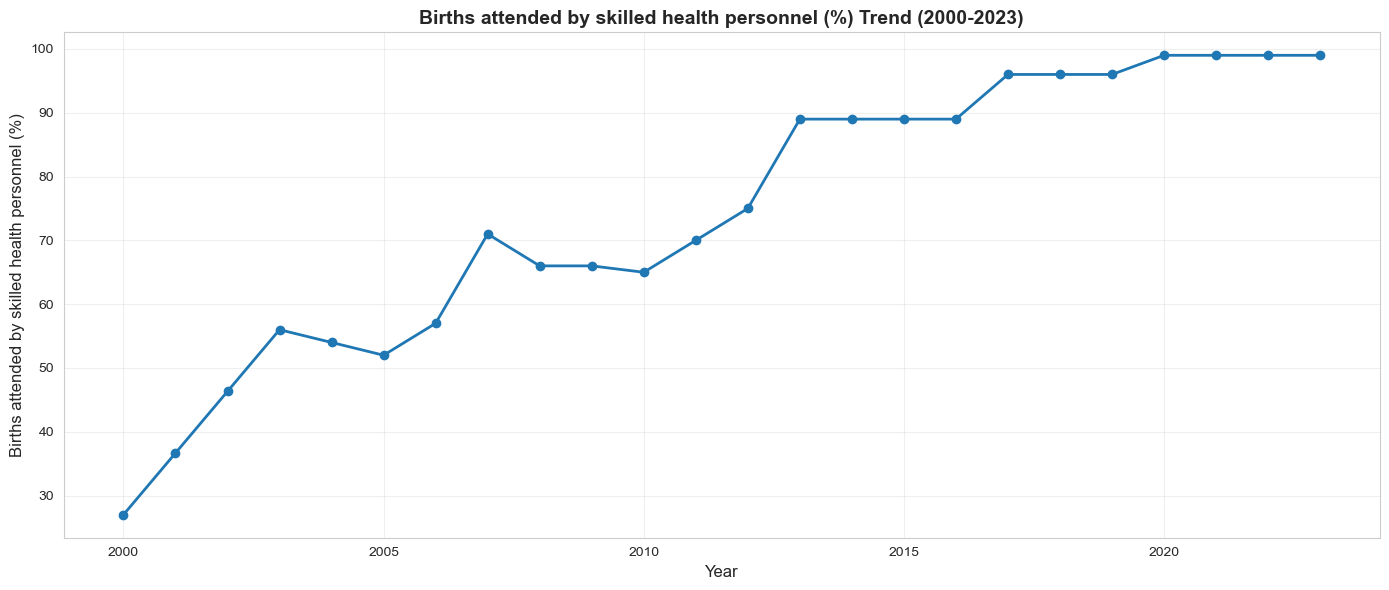

In [6]:
# Plot key trends
plot_trend_over_years(df_clean, 'Births attended by skilled health personnel (%)')

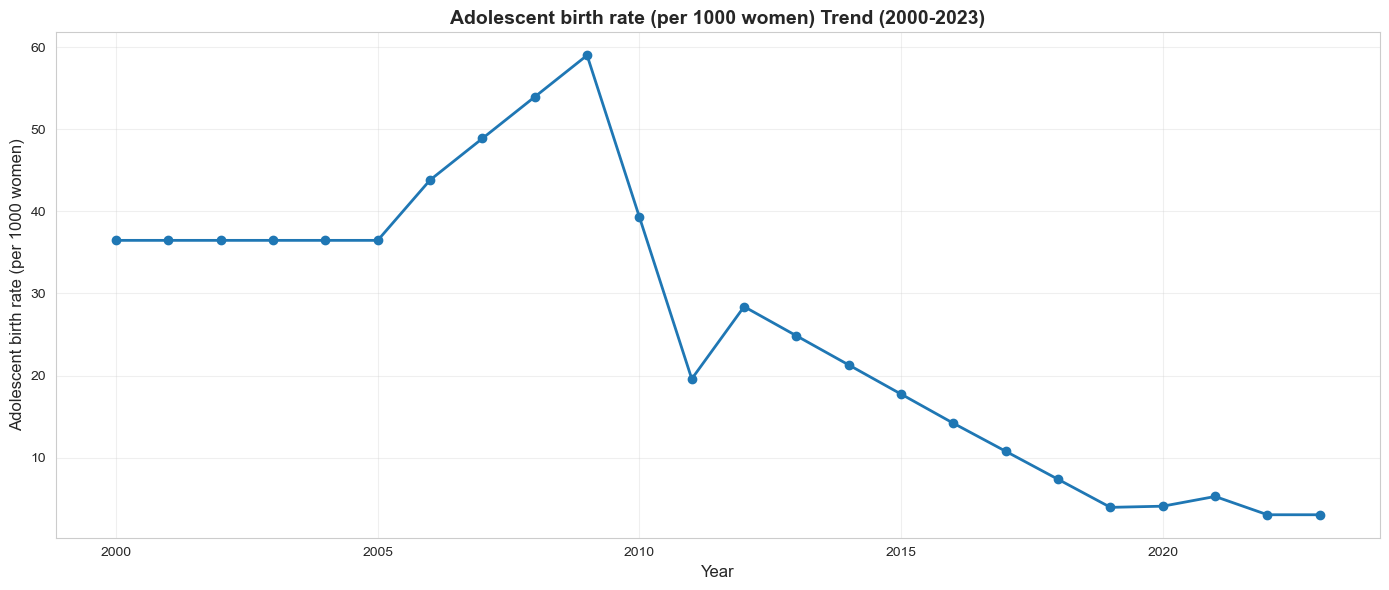

In [7]:
plot_trend_over_years(df_clean, 'Adolescent birth rate (per 1000 women)')

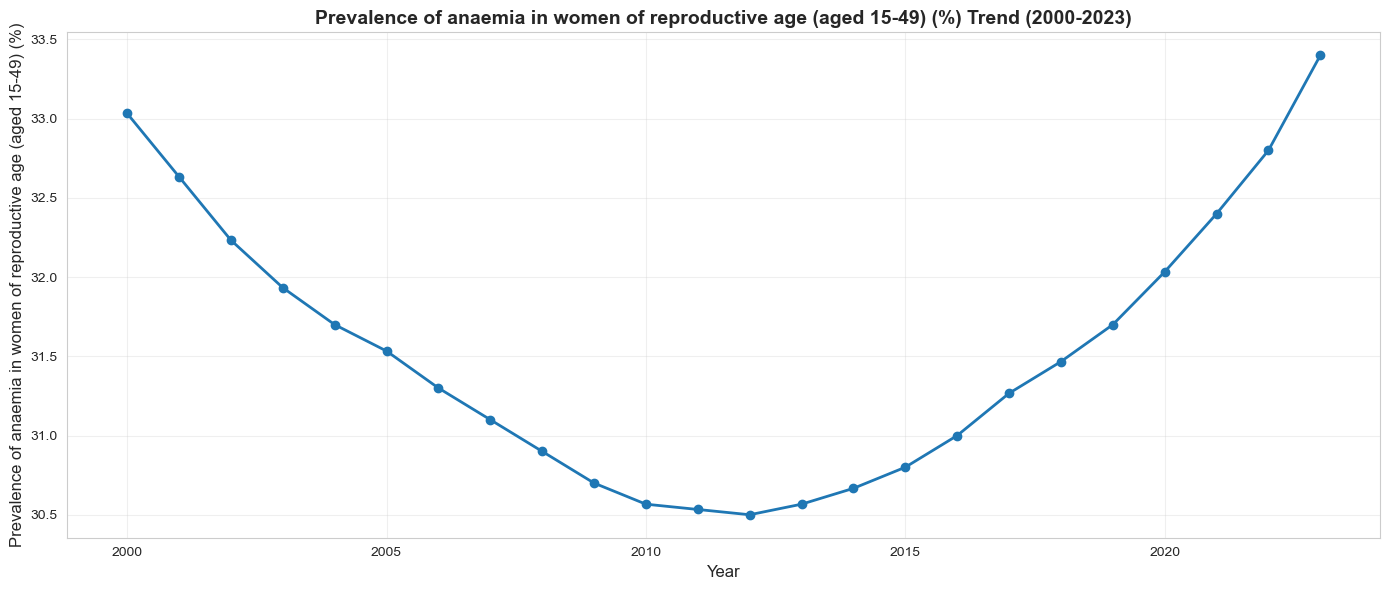

In [8]:
plot_trend_over_years(df_clean, 'Prevalence of anaemia in women of reproductive age (aged 15-49) (%)')

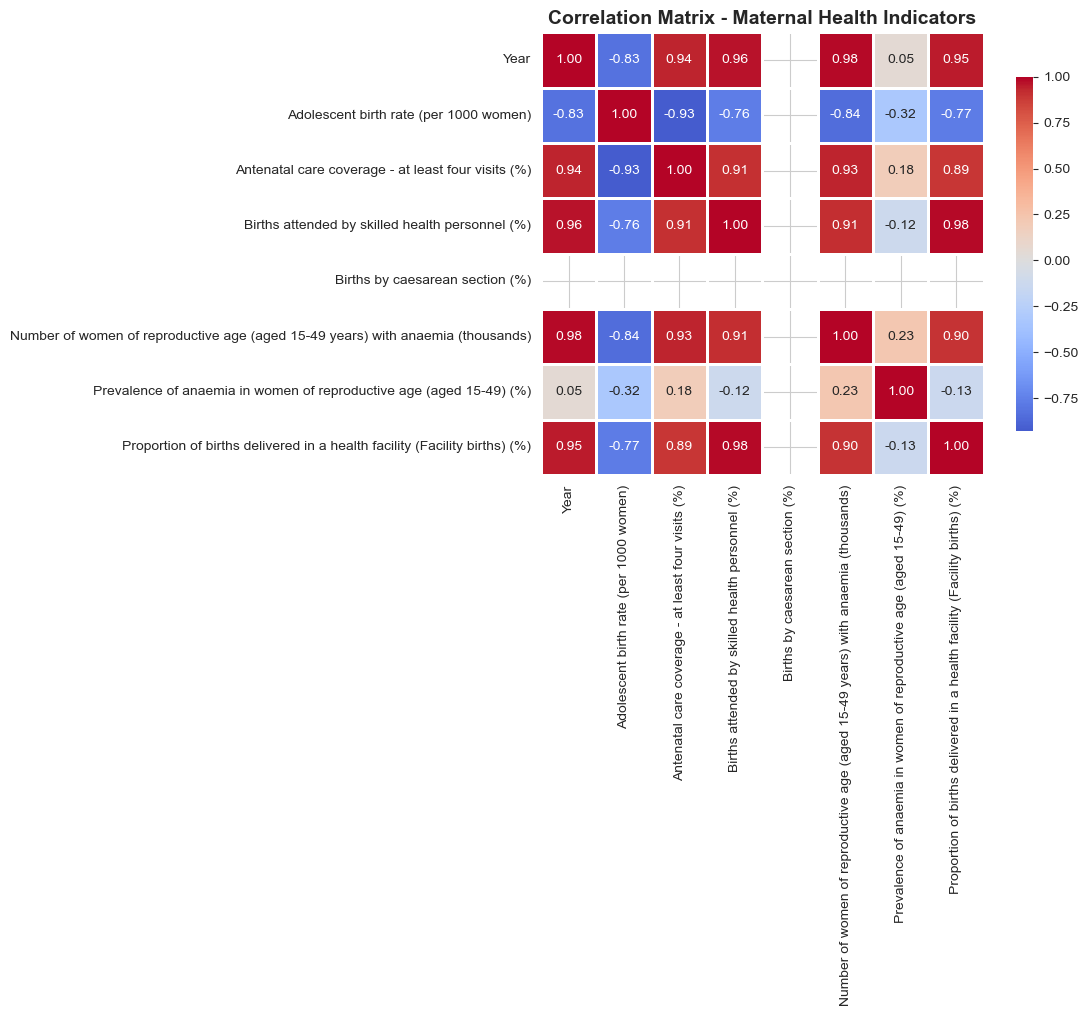

In [9]:
# Correlation analysis
correlation_heatmap(df_clean)